Modification of the 1st version: Add construction period...investment ramped linearly over the construction period

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.gridspec as gridspec
import matplotlib as mpl
#enable latex editing
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

mpl.rc('font', **font)

In [39]:
def NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price):
    prod=cf*1*365*24
    constructiont=int(round(construction_period))
    It=np.zeros(n+constructiont)
    #It[0]=It0
    Mt=np.ones(n+constructiont)*(OMkwh*prod+OMfixed)
    Et=np.ones(n+constructiont)*prod  #kwH
    if constructiont>0:  #if construction time zero, capex is the overnight cost         
        for x in range(constructiont):
            It[x]=It0/constructiont  #spread the investment evenly over the construction period
            Mt[x]=0   #No costs or production during construction
            Et[x]=0
    else:
        It[0]=It0    
    discounted_benefits=0.0
    discounted_costs=0.0
    for x in range(n+constructiont):
        t=x
        benefit=Et[x]*(wholesale_price/1000)/np.power((1+r),t)
        cost=(It[x]+Mt[x])/np.power((1+r),t)
        discounted_benefits=discounted_benefits+benefit
        discounted_costs=discounted_costs+cost
    return discounted_benefits-discounted_costs
    

In [33]:
#Assume that wholesale price simply fluctuates in time in the given range...i.e. permanently low wholesale price
def NPV2(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesalemin,wholesalemax):
    prod=cf*1*365*24
    constructiont=int(round(construction_period))
    It=np.zeros(n+constructiont)
    #It[0]=It0
    Mt=np.ones(n+constructiont)*(OMkwh*prod+OMfixed)
    Et=np.ones(n+constructiont)*prod  #kwH
    if constructiont>0.5:
        for x in range(constructiont):
            It[x]=It0/constructiont  #spread the investment evenly over the construction period
            Mt[x]=0   #No costs or production during construction
            Et[x]=0
    else:
        It[0]=It0
    discounted_benefits=0.0
    discounted_costs=0.0
    for x in range(n+constructiont):
        t=x
        wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)
        #wholesale_price=0.5*(wholesalemin+wholesalemax)
        benefit=Et[x]*(wholesale_price/1000)/np.power((1+r),t)
        cost=(It[x]+Mt[x])/np.power((1+r),t)
        discounted_benefits=discounted_benefits+benefit
        discounted_costs=discounted_costs+cost
    return discounted_benefits-discounted_costs
    

# Histogram of all sources together loop over something

In [9]:
#Nuclear parameters from DIW report. Others from Fraunhofer
It0=4000  #Euros/kW
n=40      #years
nw=25
ns=25
now=25
cf=0.9
r=0.04    #Discount rate
OMkwh=0.012  #Euros/kWh variable O&M
OMfixed=90   #Euros/kW fixed O&M
OMkwhw=0.005  #Euros/kWh variable O&M
OMfixedw=30   #Euros/kW fixed O&M
OMkwhow=0.0  #Euros/kWh variable O&M
OMfixedow=100   #Euros/kW fixed O&M
OMkwhs=0.0  #Euros/kWh variable O&M
wholesale_price=80  #Euros/MWh
construction_period=6*0   #years...rounded to integer here. If zero, capex is the overnight cost
construction_periodw=3*0 
construction_periodow=4*0
construction_periods=2*0

In [27]:
#Testing that the function works reasonably
NPV_nuclear=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

0


In [28]:
It0

4000

In [29]:
NPV_nuclear

5.18298570039047

In [30]:
CO2min=0
CO2max=40
CO2samples=3
CO2taxv=np.linspace(CO2min,CO2max,CO2samples)
samples=100000
NPV_nuclearv=np.zeros(samples)
NPV_windv=np.zeros(samples)
NPV_owindv=np.zeros(samples)
NPV_solarv=np.zeros(samples)
rmin=0.04
rmax=0.1
Itmin=4000
Itmax=9000
cf=0.9
wholesalemin=20
wholesalemax=80
Itminw=1500   #wind capex https://www.ise.fraunhofer.de/content/dam/ise/en/documents/publications/studies/EN2018_Fraunhofer-ISE_LCOE_Renewable_Energy_Technologies.pdf
Itmaxw=2000
Itminow=3100    #Off shore wind capex...from Fraunhofer
Itmaxow=4700
cfminw=0.2
cfmaxw=0.37
cfminow=0.37
cfmaxow=0.51
Itmins=600   #solar capex range ...from Fraunhofer
Itmaxs=1400
cfmins=0.09
cfmaxs=0.12

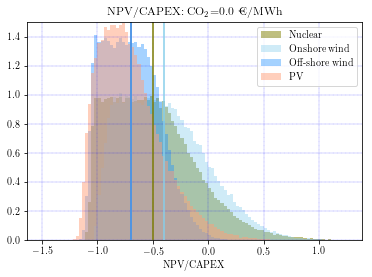

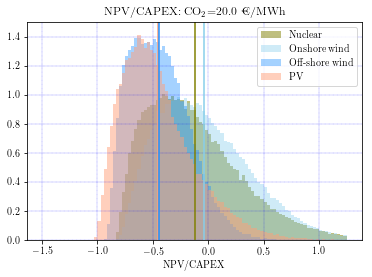

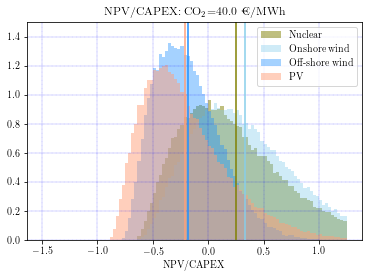

In [48]:
bins_fixed = np.linspace(-1.1, 1.25, 100)
kwargsn={'color':'olive'}
kwargsw={'color':'skyblue'}
kwargss={'color':'lightsalmon'}
kwargsow={'color':'dodgerblue'}
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
yval=np.zeros(CO2samples)
yval[0]=5
yval[1]=3.5
yval[2]=2.5
#yval[0]=1.5   #NPV run
#yval[1]=1.5
#yval[2]=1.5
#bins_fixed = np.linspace(-1.5, 1.25, 100) #NPV run
#fig = plt.figure(constrained_layout=True)
#gs = gridspec.GridSpec(3, 1, figure=fig)
for co in range(CO2samples):
    filename= "./Nice_ones/All_NPV2_relative_to_capex_taxes" + str(co)+ ".png"
    #filename= "./Figs/"+str(100+co)+ ".png"
    CO2tax=CO2taxv[co]
    for x in range(samples):        
        It0=np.random.uniform(low=Itmin,high=Itmax)
        It0w=np.random.uniform(low=Itminw,high=Itmaxw)
        It0ow=np.random.uniform(low=Itminow,high=Itmaxow)
        It0s=np.random.uniform(low=Itmins,high=Itmaxs)
        wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)+CO2tax
        r=np.random.uniform(low=rmin,high=rmax)
        cfw=np.random.uniform(low=cfminw,high=cfmaxw)
        cfs=np.random.uniform(low=cfmins,high=cfmaxs)
        cfow=np.random.uniform(low=cfminow,high=cfmaxow)
        OMfixeds=0.025*It0s   #2.5% of capex for PV
        #NPV_nuclearv[x]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/It0   
        #NPV_windv[x]=NPV(construction_periodw,nw,r,cfw,It0w,OMkwhw,OMfixedw,wholesale_price)/It0w
        #NPV_solarv[x]=NPV(construction_periods,ns,r,cfs,It0s,OMkwhs,OMfixeds,wholesale_price)/It0s
        #NPV_owindv[x]=NPV(construction_periodow,now,r,cfow,It0ow,OMkwhow,OMfixedow,wholesale_price)/It0ow
        NPV_nuclearv[x]=NPV2(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesalemin+CO2tax,wholesalemax+CO2tax)/It0   
        NPV_windv[x]=NPV2(construction_periodw,nw,r,cfw,It0w,OMkwhw,OMfixedw,wholesalemin+CO2tax,wholesalemax+CO2tax)/It0w
        NPV_solarv[x]=NPV2(construction_periods,ns,r,cfs,It0s,OMkwhs,OMfixeds,wholesalemin+CO2tax,wholesalemax+CO2tax)/It0s
        NPV_owindv[x]=NPV2(construction_periodow,now,r,cfow,It0ow,OMkwhow,OMfixedow,wholesalemin+CO2tax,wholesalemax+CO2tax)/It0ow
    #fig.add_subplot(gs[co, 0])
    plt.hist([NPV_nuclearv], bins_fixed,alpha=0.5,density=True,label='Nuclear',**kwargsn)    
    plt.hist([NPV_windv], bins_fixed,alpha=0.4,density=True,label='Onshore wind',**kwargsw)
    plt.hist([NPV_owindv], bins_fixed,alpha=0.4,density=True,label='Off-shore wind',**kwargsow)
    plt.hist([NPV_solarv], bins_fixed,alpha=0.5,density=True,label='PV',**kwargss)
    xv=np.ones(2)*np.mean(NPV_nuclearv)
    yv=np.zeros(2)
    yv[1]=yval[co]    
    plt.plot(xv,yv,**kwargsn)
    xv=np.ones(2)*np.mean(NPV_windv)
    plt.plot(xv,yv,**kwargsw)
    xv=np.ones(2)*np.mean(NPV_solarv)
    plt.plot(xv,yv,**kwargss)
    xv=np.ones(2)*np.mean(NPV_owindv)
    plt.plot(xv,yv,**kwargsow)
    plt.legend(loc='upper right')
    plt.title("NPV/CAPEX: CO$_{2}$="+str(round(CO2tax,2))+" €/MWh")
    plt.xlabel("NPV/CAPEX")
    #plt.ylabel("frequency")
    #plt.xlim((-1.1,0.5))
    plt.ylim((0,yv[1]))
    plt.grid(color='b', linestyle='--', linewidth=0.25)
    plt.savefig(filename)
    plt.show()

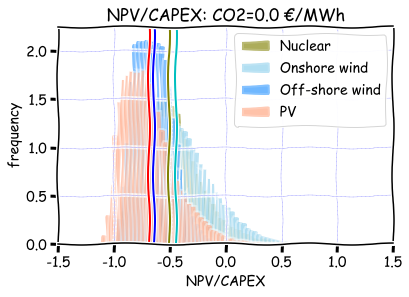

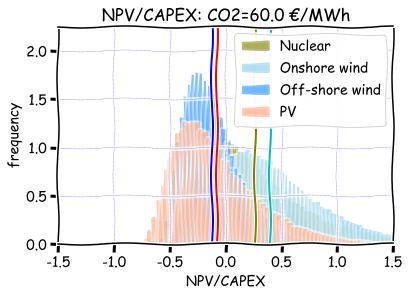

In [60]:
#Just for fun...maybe xkcd style
with plt.xkcd():
    for co in range(CO2samples):
        filename= "./Figs/All_together_NPV_relative_to_capex_taxes" + str(co)+ ".png"
        CO2tax=CO2taxv[co]
        for x in range(samples):        
            It0=np.random.uniform(low=Itmin,high=Itmax)
            It0w=np.random.uniform(low=Itminw,high=Itmaxw)
            It0ow=np.random.uniform(low=Itminow,high=Itmaxow)
            It0s=np.random.uniform(low=Itmins,high=Itmaxs)
            wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)+CO2tax
            r=np.random.uniform(low=rmin,high=rmax)
            cfw=np.random.uniform(low=cfminw,high=cfmaxw)
            cfs=np.random.uniform(low=cfmins,high=cfmaxs)
            cfow=np.random.uniform(low=cfminow,high=cfmaxow)
            OMfixeds=0.025*It0s   #2.5% of capex
            #NPV_nuclearv[x]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/It0   
            #NPV_windv[x]=NPV(construction_periodw,nw,r,cfw,It0w,OMkwhw,OMfixedw,wholesale_price)/It0w
            #NPV_solarv[x]=NPV(construction_periods,ns,r,cfs,It0s,OMkwhs,OMfixeds,wholesale_price)/It0s
            #NPV_owindv[x]=NPV(construction_periodow,now,r,cfow,It0ow,OMkwhow,OMfixedow,wholesale_price)/It0ow
            NPV_nuclearv[x]=NPV2(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesalemin,wholesalemax)/It0   
            NPV_windv[x]=NPV2(construction_periodw,nw,r,cfw,It0w,OMkwhw,OMfixedw,wholesalemin,wholesalemax)/It0w
            NPV_solarv[x]=NPV2(construction_periods,ns,r,cfs,It0s,OMkwhs,OMfixeds,wholesalemin,wholesalemax)/It0s
            NPV_owindv[x]=NPV2(construction_periodow,now,r,cfow,It0ow,OMkwhow,OMfixedow,wholesalemin,wholesalemax)/It0ow
        plt.hist([NPV_nuclearv], bins_fixed,alpha=0.4,density=True,color = ["olive"],label='Nuclear',**kwargsn)
        plt.hist([NPV_windv], bins_fixed,alpha=0.4,density=True,color = ["skyblue"],label='Onshore wind')
        plt.hist([NPV_owindv], bins_fixed,alpha=0.4,density=True,color = ["dodgerblue"],label='Off-shore wind')
        plt.hist([NPV_solarv], bins_fixed,alpha=0.4,density=True,color = ["lightsalmon"],label='PV')
        xv=np.ones(2)*np.mean(NPV_nuclearv)
        yv=np.zeros(2)
        yv[1]=2.25
        #nu=plt.plot(xv,yv,'g')
        kwargsn={'color':'olive'}
        plt.plot(xv,yv,**kwargsn)
        xv=np.ones(2)*np.mean(NPV_windv)
        kwargsw={'color':'skyblue'}
        plt.plot(xv,yv,**kwargsw)
        kwargss={'color':'lightsalmon'}
        xv=np.ones(2)*np.mean(NPV_solarv)
        plt.plot(xv,yv,**kwargss)
        xv=np.ones(2)*np.mean(NPV_owindv)
        kwargsow={'color':'dodgerblue'}
        plt.plot(xv,yv,**kwargsow)
        plt.legend(loc='upper right')
        plt.title("NPV/CAPEX: CO2="+str(CO2tax)+" €/MWh")
        plt.xlabel("NPV/CAPEX")
        plt.ylabel("frequency")
        plt.xlim((-1.5,1.5))
        plt.ylim((0,2.25))
        plt.grid(color='b', linestyle='--', linewidth=0.25)
        plt.savefig(filename)
        plt.show()